In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from natsort import index_natsorted, order_by_index

In [2]:
vaccine_file = pd.read_csv('.\data\commmon_user_vaccine.csv')
mask_file = pd.read_csv('.\data\common_user_mask.csv')

In [7]:
vaccine_file = vaccine_file.reindex(index=order_by_index(vaccine_file.index, index_natsorted(vaccine_file['user'])))
mask_file = mask_file.reindex(index=order_by_index(mask_file.index, index_natsorted(mask_file['user'])))
mask_file = mask_file.drop_duplicates(subset='                    tweet_id', keep='last')
vaccine_file = vaccine_file.drop_duplicates(subset='                    tweet_id', keep='last')

In [14]:
mask_file = mask_file.reset_index()
vaccine_file = vaccine_file.reset_index()

In [19]:
common_users = list(mask_file['user'])

In [21]:
mask_users = pd.read_csv('.\data\mask_users.csv')
set_common_users = set(common_users)

In [22]:
unfiltered_users = list(mask_users['user'])
list_id = list()
for i in range(len(unfiltered_users)):
    if unfiltered_users[i] in set_common_users:
        list_id.append(i)

In [27]:
common_users = mask_users.iloc[list_id].reset_index()

In [30]:
common_users = common_users.reindex(index=order_by_index(common_users.index, index_natsorted(common_users['user'])))

In [32]:
common_users.to_csv('.\data\common_users.csv')
vaccine_file.to_csv('.\data\common_user_vaccine.csv')
mask_file.to_csv('.\data\common_user_mask.csv')

In [3]:
user_file.head()

,id,screen_name,location,description,followers_count,lists,created_at,likes,name,url,...,statuses_count,time_zone,geo_enabled,lang,utc_offset,contributors_enabled,is_translator,profile_background_color,utc_offset.1,contributors_enabled.1
0,576617779,MikeSmithofABQ,Albuquerque NM,Author conceptualist finishing Book 1 of an ...,1269,46,10-May-2012 (22:11:41.000000),109125,MichaelFarrellSmith,https://collectiveunrest.com/2018/08/15/may-of...,...,40133,None,True,None,None,False,False,C0DEED,None,False
1,859372697163378689,EPanisello94,None,Administrativa @juntsxcat @CridaNacional i @R...,1461,7,02-May-2017 (11:43:12.000000),71229,Eva Panisello 🎗,None,...,43775,None,True,None,None,False,False,F5F8FA,None,False
2,3885530234,KamilleJeske,None,None,139,0,13-Oct-2015 (23:17:47.000000),15742,milliej.,None,...,2217,None,False,None,None,False,False,C0DEED,None,False
3,34200071,CarlosTVRadio,Hollywood CA.,Veteran journalist 22 Emmy Awards Producer ...,13073,240,22-Apr-2009 (05:51:29.000000),1644,Carlos Amezcua,http://www.beond.tv,...,5696,None,True,None,None,False,False,1A1B1F,None,False
4,1262823086971330560,NABIL1O8O,Follow back bg / wz,Les meilleurs pour la fin c’est pour ça qu’on ...,403,0,19-May-2020 (19:11:10.000000),49,NABIL 🇩🇿💪🏽,None,...,490,None,False,None,None,False,False,F5F8FA,None,False


In [6]:
tweet_path = './output/filtered/'
tweet_folders = os.listdir(tweet_path)
vaccine_post = '/combined_vaccine.csv'
mask_post = '/masking.csv'
vaccine_file = pd.read_csv(tweet_path + tweet_folders[0] + vaccine_post, error_bad_lines=False)
mask_file = pd.read_csv(tweet_path + tweet_folders[0] + mask_post, error_bad_lines=False)
for i in range(1,len(user_files)):
    temp = pd.read_csv(tweet_path + tweet_folders[0] + mask_post, error_bad_lines=False)
    mask_file = pd.concat([mask_file, temp], ignore_index=True)
    temp = pd.read_csv(tweet_path + tweet_folders[0] + vaccine_post, error_bad_lines=False)
    vaccine_file = pd.concat([vaccine_file, temp], ignore_index=True)

In [297]:
vaccine_file = vaccine_file.reindex(index=order_by_index(vaccine_file.index, index_natsorted(vaccine_file['user'])))
mask_file = mask_file.reindex(index=order_by_index(mask_file.index, index_natsorted(mask_file['user'])))

In [320]:
vaccine_file.to_csv('./output/vaccine_text.csv')
mask_file.to_csv('./output/mask_text.csv')

In [15]:
set_mask = set(list(mask_file['user']))
set_vaccine = set(list(vaccine_file['user']))
set_co = set_mask.intersection(set_vaccine)

In [21]:
list_mask = list(mask_file['user'])
indices_mask = list()
for i in range(len(list_mask)):
    if list_mask[i] in set_co:
        indices_mask.append(i)
        
list_vaccine = list(vaccine_file['user'])
indices_vaccine = list()
for i in range(len(list_vaccine)):
    if list_vaccine[i] in set_co:
        indices_vaccine.append(i)

In [25]:
from natsort import index_natsorted, order_by_index
co_vaccine = vaccine_file.iloc[indices_vaccine]
co_mask = mask_file.iloc[indices_mask]
co_vaccine = co_vaccine.reindex(index=order_by_index(co_vaccine.index, index_natsorted(co_vaccine['user'])))
co_mask = co_mask.reindex(index=order_by_index(co_mask.index, index_natsorted(co_mask['user'])))

In [27]:
co_vaccine.to_csv('./output/commmon_user_vaccine.csv')
co_mask.to_csv('./output/common_user_mask.csv')

In [28]:
user_dict = user_file.set_index('screen_name').T.to_dict('list')

<ipython-input-28-61543045d8e4>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  user_dict = user_file.set_index('screen_name').T.to_dict('list')


In [30]:
user_dict.get('1000rrKnight')

['332313459',
 'eternity',
 'I like numbers  coincidence & pictures.Reality Architect.',
 '186',
 '3',
 '09-Jul-2011 (15:46:38.000000)',
 '6707',
 'MadeInAmerica',
 'None',
 'none',
 'False',
 'False',
 '249',
 '4988',
 'None',
 'False',
 'None',
 'None',
 'False',
 'False',
 'C0DEED',
 'None',
 False]

In [51]:
mask_users = pd.DataFrame(set(list(mask_file['user'])))
mask_users = mask_users.rename(columns={0:'user'})

In [52]:
location = []
description = []
followers = []
name = []
created_at = []
likes = []
statuses_count = []
for screen_name in mask_users['user']:
    data = user_dict.get(screen_name)
    if data!=None:
        location.append(data[1])
        description.append(data[2])
        followers.append(data[3])
        created_at.append(data[5])
        likes.append(data[6])
        name.append(data[7])
        statuses_count.append(data[13])
    else:
        location.append(None)
        description.append(None)
        followers.append(None)
        created_at.append(None)
        likes.append(None)
        name.append(None)
        statuses_count.append(None)

In [53]:
mask_users['location'] = location
mask_users['description'] = description
mask_users['followers'] = followers
mask_users['name'] = name
mask_users['created_at'] = created_at
mask_users['likes'] = likes
mask_users['statuses_count'] = statuses_count

In [56]:
vaccine_users

,user,location,description,followers,name,created_at,likes,statuses_count
0,teachermcafee,None,Educator. Activist. Vegetarian. Expat-Immigran...,88,Vote NOW,11-Nov-2015 (18:20:43.000000),12098,8872
1,HeidiVital,None,what’s meant for me will always be for me.,399,Heidi Vital,13-Jan-2013 (04:32:07.000000),18767,12996
2,CarlosA37393991,Zapopan Jalisco,Ex A IPN Former Kodak Manager Ex Regidor. Pr...,1031,Carlos Andrade,12-Jul-2019 (04:11:26.000000),15635,9005
3,jgruoner,None,None,166,Josh Gruoner,22-Oct-2012 (21:15:32.000000),35217,35415
4,leedotporter,nottingham,lonely derby fan in Notts.,50,Lee Porter,30-May-2009 (21:27:36.000000),199,964
...,...,...,...,...,...,...,...,...
9740,Thunderball_71,Orlando FL,🇺🇸🏳️‍🌈,11,Rodney R.,02-Dec-2015 (15:48:48.000000),709,881
9741,MartiaFG,None,De Sancho Panza a Don Quijote y viceversa.// ...,336,Martia FG 🖤,16-May-2014 (21:02:12.000000),36281,63557
9742,CharMBrown4,Houston TX,Love God. I love my family friends and music...,1103,Charlotte Brown,17-Apr-2009 (03:52:08.000000),64012,27271
9743,byanca85076701,None,*byanca*,0,byanca,31-Oct-2020 (05:09:38.000000),82,4


In [55]:
vaccine_users = pd.DataFrame(set(list(vaccine_file['user'])))
vaccine_users = vaccine_users.rename(columns={0:'user'})

location = []
description = []
followers = []
name = []
created_at = []
likes = []
statuses_count = []
for screen_name in vaccine_users['user']:
    data = user_dict.get(screen_name)
    if data!=None:
        location.append(data[1])
        description.append(data[2])
        followers.append(data[3])
        created_at.append(data[5])
        likes.append(data[6])
        name.append(data[7])
        statuses_count.append(data[13])
    else:
        location.append(None)
        description.append(None)
        followers.append(None)
        created_at.append(None)
        likes.append(None)
        name.append(None)
        statuses_count.append(None)
        
vaccine_users['location'] = location
vaccine_users['description'] = description
vaccine_users['followers'] = followers
vaccine_users['name'] = name
vaccine_users['created_at'] = created_at
vaccine_users['likes'] = likes
vaccine_users['statuses_count'] = statuses_count

In [67]:
vac_state = list()
vac_loc = list(vaccine_users['location'])
for loc in vac_loc:
    vac_state.append(get_states(loc))

mask_state = list()
mask_loc = list(mask_users['location'])
for loc in mask_loc:
    mask_state.append(get_states(loc))

vaccine_users['state'] = vac_state
mask_users['state'] = mask_state

In [172]:
vac_pol = [None] * len(vac_state)


In [235]:
mask_pol = [None] * len(mask_state)

In [236]:
description = list(vaccine_users['description'])
for i in range(len(description)):
    description[i] = description[i].lower()

descript = list(mask_users['description'])
for i in range(len(descript)):
    if descript[i]!=None:
        descript[i] = str(descript[i]).lower()
    else:
        descript[i] = 'None'

In [77]:
def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search

In [280]:
for i in range(len(description)):
    if findWholeWord('wearamask')(description[i]):
        print(i, description[i])
        if vac_pol[i]==None:
            vac_pol[i] = 'Dem'

608 #democraticsocialist #noh8 #wearamask #bidenharris2020  #lgbtq #blacklivesmatter !#savetheusps
730 random ass kid | i retweet toxicity of the cpc and gop | liberal | kenney=ford=trump | no lists | #istandwithtrudeau #bidenharris2020 #blm #wearamask
959 she / her#wearamask 😷😷😷take care of each other 💖plant native trees 🌳1st love #megalithicireland  🌟#irish mum 2 #autistic sons
1149 #arizona #wearamask #vote #everythingisatstake #countryoverparty #flipthesenate
1236 indy thinker/voter in ok honesty+fairness+kindness#resist #retireinhofe #voteforabby #wearamask #equalrights #blm #bidenharris2020no chump trolls magats or q!
1773 liberal activist  animal lover  anti-gun... guns kill; that is what they were invented for.  🇺🇸💯 #bidenharris2020 💯🇺🇸 #wearamask
1820 i cuss. get over it. #breastcancersucks#americaortrump #wearamask #swat #trustfauci#trumpusagreatestfailure#gopdeathpanels
2350 wear 😷 a 😷 mask 😷 vote🗣vote🗣vote🗣 💙🌎 #staysafe #washhands #wearamask😷 #socialdistance
2453 i know a l

In [266]:
dem_word_list = ['voteblue','progressive','black lives matter','blm','former republican',
                 'bidenharris2020','biden2020','resist','socialist','lgbt','metoo','trumprussia',
                'impeachtrump','wearamask']
rep_word_list = ['maga','americafirst','trump2020','constitution','qanon','prolife','christian',
                 'patriot','conservative','buildthewall','trumptrain','nationalist','nra','kag']

In [321]:
for i in range(len(descript)):
    if findWholeWord('nonon')(descript[i]):
        print(i, descript[i])
#         if mask_pol[i]==None:
#             mask_pol[i] = 'Dem'   

In [414]:
count = 0
for i in vac_pol:
    if i==None:
        count+=1
count

8268

In [403]:
len(mask_pol),len(vac_pol)

(12547, 9745)

In [415]:
mask_users['pol'] = mask_pol
vaccine_users['pol'] = vac_pol

In [325]:
mamama_users = list(mask_users['user'])
vavava_users = list(vaccine_users['user'])

In [311]:
mask_file = mask_file.drop_duplicates(subset='                    tweet_id', keep='last')
vaccine_file = vaccine_file.drop_duplicates(subset='                    tweet_id', keep='last')
mask_file = mask_file.reset_index()
vaccine_file = vaccine_file.reset_index()

In [399]:
vavava_users.index('NiNi_McG')

ValueError: 'NiNi_McG' is not in list

In [326]:
mask_tweet_list = list(mask_file['text'])
mask_tl_user = list(mask_file['user'])
vac_tweet_list = list(vaccine_file['text'])
vac_tl_user = list(vaccine_file['user'])
mask_is_retweet = list(mask_file['is_retweet'])
vac_is_retweet = list(vaccine_file['is_retweet'])

In [341]:
set_dem_mask = set()
set_rep_mask = set()

In [394]:
set_dem_vac = set()
set_rep_vac = set()

In [416]:
for i in range(len(vac_is_retweet)):
#     if mask_is_retweet[i] == True:
    if findWholeWord('realdonaldtrump')(vac_tweet_list[i]):
        print(vac_tl_user[i],vac_tweet_list[i])
#         set_dem_vac.add(mask_tl_user[i])
#         set_rep_vac.add(mask_tl_user[i])

86GOPFascism RT @tedlieu: Dear @realDonaldTrump: Where is the vaccine?  https://t.co/tciCRvc0JK
420meds2 RT @tedlieu: Dear @realDonaldTrump: Where is the vaccine?  https://t.co/tciCRvc0JK
AddsEvery @realDonaldTrump Stanford releases study estimating COVID-19 cases related to President Trump’s campaign rallies" https://t.co/iRubYPwgtE  #COVID19 #coronavirus SURGES AT #Trump RALLIES I BEG you #MAGA folks what good is a #MAGA2020LandslideVictory  If you All Suffer long term #COVID19 DAMAGE?👤"
AlexDLevin Well @realDonaldTrump You finally got your Ph.D and we can officially call you Dr. Death.  Well done!
AlexMoosePerez @realDonaldTrump just wondering since you have under 36 hours left if the #covid vaccine is going to be released in the AM or PM tomorrow? You did promise remember cheeto? @perlmutations @CNN @ChrisCuomo @donlemon @maddow @nytimes @thehill
AppleRiverBnB RT @GeigerNews: Hey, President Pandemic (@realDonaldTrump), where do I go to get that Coronavirus vaccine you said would be

In [393]:
for i in range(len(mask_is_retweet)):
#     if mask_is_retweet[i] == True:
    if findWholeWord('china')(mask_tweet_list[i]):
        print(mask_tl_user[i],mask_tweet_list[i])
#         set_dem_mask.add(mask_tl_user[i])
#         set_rep_mask.add(mask_tl_user[i])

Adriantheplug99 @GoldErrrthang @tiffetha @SteveHendez @antonioestupapi @rosasierraaaa But china isn't the reason why we have Americans protesting to not wear a mask. Thats where arguments started thats where hate started growing. Either we try to slow this virus down or we keep it going. People don't get that
DavidMo66984563 @RonnyJackson4TX Nice, your volunteers wear masks/support America while Trump's WH are supporting China  Alan Greenspan: The failure of the US to effectively limit the spread of the novel coronavirus has opened the door to China becoming the world's dominant superpower https://t.co/bmvhjqVGbq
Debbie30955591 @SpeakerPelosi @mitchellreports Geez get a new song. This ones getting old. You’re not so afraid to not wear a mask to get your hair done. You weren’t too afraid or concerned when you invited us to join you in China town. Do you remember what you say? You’re ridiculous!
HughSchurtz @B52Malmet VACCINE was LISTENING to reports from China &amp; Europe, quarantine t

In [404]:
for users in set_dem_mask:
    try:
        index = mamama_users.index(users)
#         if mask_pol[index] == None:
        mask_pol[index] == 'Dem'
    except:
        continue
        
for users in set_rep_mask:
    index = mamama_users.index(users)
    if mask_pol[index] == None:
        mask_pol[index] == 'Rep'

In [412]:
for users in set_dem_vac:
    try:
        index = vavava_users.index(users)
#         if vac_pol[index] == None:
        vac_pol[index] == 'Dem'
    except:
        continue
        
for users in set_rep_vac:
    try:
        index = vavava_users.index(users)
        if vac_pol[index] == None:
            vac_pol[index] == 'Rep'
    except:
        continue

In [390]:
len(set_dem_mask)

1177

In [417]:
vaccine_users.to_csv('./output/vaccine_users.csv')
mask_users.to_csv('./output/mask_users.csv')

In [54]:
cluster_result.to_csv('.\output\cluster_result_features.csv')

In [3]:
clu_0 = cluster_result[cluster_result['cluster']==0]
clu_1 = cluster_result[cluster_result['cluster']==1]

<AxesSubplot:ylabel='Density'>

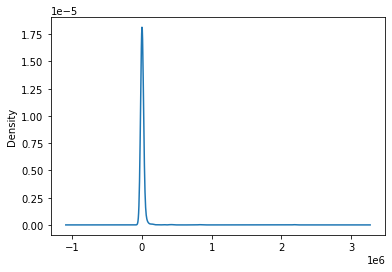

In [9]:
clu_1['followers'].astype(str).astype(int).plot.density()

In [17]:
mask.head()

,date,user,is_retweet,is_quote,text,quoted_text,lat,long,hts,mentions,tweet_id,likes,retweets,replies,quote_count,original_tweet_id
0,2020-11-02 20:45:37,0CT0BERSURPRISE,True,False,RT @BernieSanders: Fire Trump. Keep Fauci. Wea...,NaN,NaN,NaN,NaN,NaN,1323365669874749440,0,0.0,0,0.0,1.323304e+18
1,2020-11-02 16:41:56,0CoolKate0,True,False,RT @BernieSanders: Fire Trump. Keep Fauci. Wea...,NaN,NaN,NaN,NaN,NaN,1323304343940968449,0,0.0,0,0.0,1.323304e+18
2,2020-11-02 20:55:15,0Dang,True,False,RT @BernieSanders: Fire Trump. Keep Fauci. Wea...,NaN,NaN,NaN,NaN,NaN,1323368095642054656,0,0.0,0,0.0,1.323304e+18
3,2020-11-02 19:06:14,00GrlGamer00,True,False,RT @BernieSanders: Fire Trump. Keep Fauci. Wea...,NaN,NaN,NaN,NaN,NaN,1323340658732462080,0,0.0,0,0.0,1.323304e+18
4,2020-11-02 19:58:50,0Kellz,True,False,RT @kalpenn: ✅ confirm your polling location ...,NaN,NaN,NaN,NaN,NaN,1323353895557648385,0,0.0,0,0.0,1.323335e+18


In [36]:
hts = clu_0_tweets['mentions']
nona = hts.notna()
truehts = hts[nona].reset_index(drop=True)
for i in range(len(truehts)):
    truehts[i] = truehts[i].lower()
htcount = list()
for i in range(len(truehts)):
    for j in range(len(truehts[i].split(';'))):
        htcount.append(truehts[i].split(';')[j])
htfreq = [htcount.count(ht) for ht in htcount]
htdict = dict(list(zip(htcount, htfreq)))
sorted_ht = sorted(htdict.items(), key = lambda k: k[1], reverse=True)

In [37]:
sorted_ht[0:100]

[('realdonaldtrump', 51),
 ('chiarafer18', 50),
 ('iiwasanoldcard1', 50),
 ('joebiden', 50),
 ('michaelsadgrove', 34),
 ('bbcnews', 34),
 ('rosie_wearamask', 33),
 ('islandgirlprv', 33),
 ('rwolf5115', 33),
 ('ingrahamangle', 33),
 ('foxnews', 31),
 ('richardgrenell', 26),
 ('winmetawin', 23),
 ('mulawinmetawin', 22),
 ('wawa', 21),
 ('shaunlintern', 18),
 ('nigel_farage', 18),
 ('isabeloakeshott', 18),
 ('alisongeorge10', 17),
 ('cnn', 14),
 ('trishayearwood', 13),
 ('cher', 13),
 ('lizzywales', 11),
 ('johnjharwood', 10),
 ('vision835', 10),
 ('3drosellc', 9),
 ('amazon', 9),
 ('nicholaskamau', 9),
 ('projectlincoln', 8),
 ('kamalaharris', 8),
 ('thomaskaine5', 7),
 ('kingrezizt', 7),
 ('ifindkarma', 6),
 ('drericding', 6),
 ('vp', 6),
 ('cdcgov', 6),
 ('billydees', 6),
 ('steve_vladeck', 6),
 ('maryellen622', 6),
 ('sonya_tn', 6),
 ('missin_florida', 6),
 ('fix8d2020', 6),
 ('teamtrump', 5),
 ('kylie__berger_', 5),
 ('yourliverlife', 5),
 ('cleavon_md', 5),
 ('soloyochapin', 5),
 ('